In [1]:
%matplotlib inline

# INF-616 - Aula 3: SVR

Professor: Ricardo da Silva Torres -- rtorres@ic.unicamp.br

Professor: Alexandre Ferreira -- melloferreira@ic.unicamp.br  

Monitor: Lucas David -- lucasolivdavid@gmail.com

Este *notebook* faz parte da disciplina INF-616 no curso de extensão MDC.  
Demais artefatos podem ser encontrados no moodle da disciplina.

Instituto de Computação - Unicamp 2019

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Carrega o dataset

boston_dataset = datasets.load_boston()
X_full = boston_dataset.data
Y = boston_dataset.target
print (X_full.shape)
print (Y.shape)

(506, 13)
(506,)


In [4]:
# Apresentação do dataset

print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Abaixo selecionamos uma feature (a mais discriminativa) com o SelectKBest, a qual é ajustada aos dados com o método ``.fit ()``. Dessa forma reduzimos o conjunto de dados a um vetor, que pode ser recuperado pelo método ``.get_support()``.

In [5]:
# Seleciona 'melhor' feature

selector = SelectKBest(f_regression, k=1)
selector.fit(X_full, Y)
X = X_full[:, selector.get_support()]
print (X.shape)

(506, 1)


Como o target é um vetor, podemos tentar ver se existe uma relação linear da entrada (feature) com a saída (valor da casa). Se existir, a saída se comportará de forma constante a mudanças na entrada.

In [6]:
# Função para plotar o gráfico

def plot_scatter(X,Y,R=None):
    plt.scatter(X, Y, s=50, marker='o', facecolors='none', edgecolor="blue")
    if R is not None:
        plt.scatter(X, R, color='red', linewidth=0.2)
    plt.show()

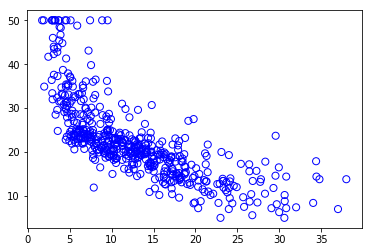

In [7]:
plot_scatter(X,Y)

No exemplo, podemos ver que ``X`` aumenta e ``Y`` diminui, mas isso não acontece em uma taxa constante.

Para visualizar este fenomeno, o gráfico abaixo tenta plotar uma reta utilizando um kernel linear. Claramente este modelo é uma aproximação que não funciona muito bem.

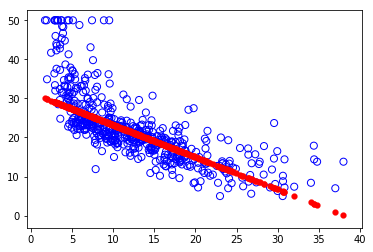

In [8]:
regressor = SVR(kernel='linear').fit(X, Y)
plot_scatter(X, Y, regressor.predict(X))

Como o modelo linear não funcionou muito bem, podemos: (1) transformar as features em lineares ou (2) utilizar um modelo não linear. Optamos pela segunda alternativa:

/Users/rtorres/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


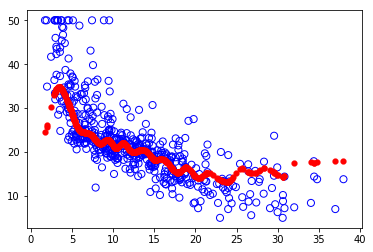

In [9]:
regressor = SVR(kernel='rbf').fit(X, Y)
plot_scatter(X, Y, regressor.predict(X))

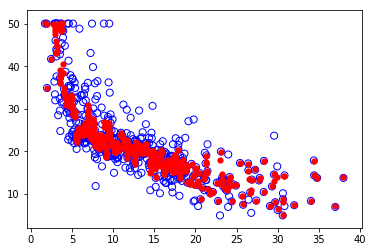

In [10]:
# Testando diferentes valores de 'C' e 'gamma'

regressor = SVR(kernel='rbf', C=1000, gamma=10).fit(X, Y)
plot_scatter(X, Y, regressor.predict(X))

## SVRs com kernel linear e não-linear

Exemplo simples de regressão 1D usando kernels lineares e RBF.

*Fonte: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html*

In [11]:
# Gera dados sintéticos

X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

print(X.shape)
print(y.shape)

(40, 1)
(40,)


In [12]:
# Adiciona algum ruído no target

y[::5] += 3 * (0.5 - np.random.rand(8))

In [13]:
# Treina e testa o modelo de regressão

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')

y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)

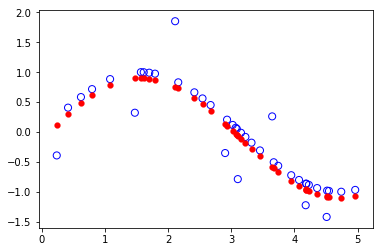

In [14]:
plot_scatter(X, y, y_rbf)

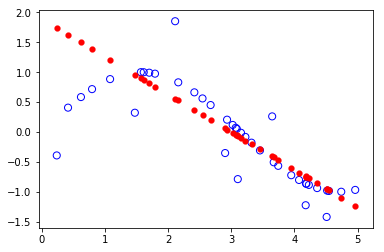

In [15]:
plot_scatter(X, y, y_lin)

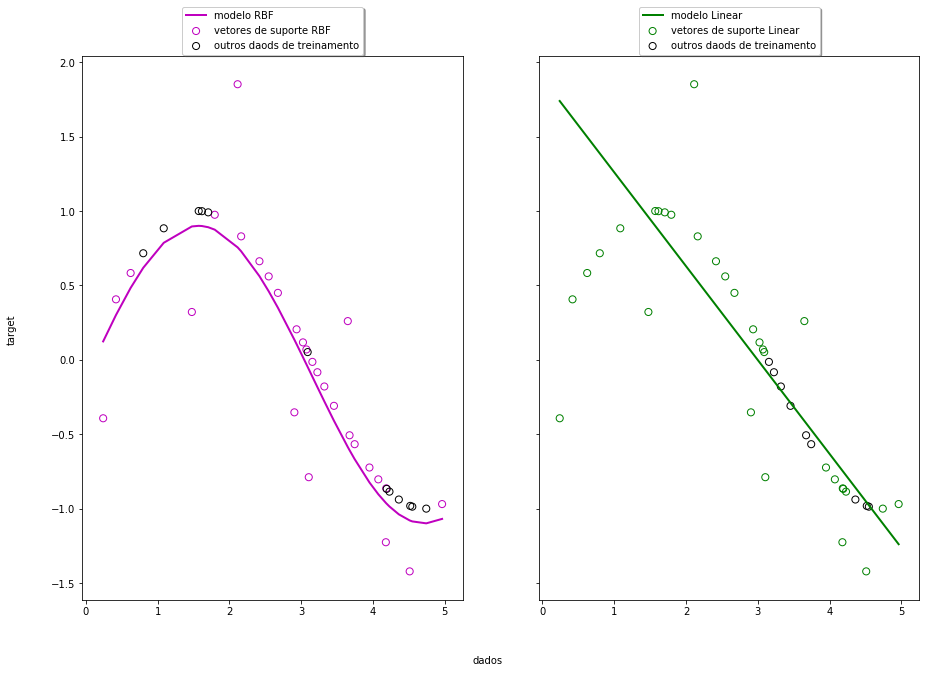

In [16]:
# Uma melhor forma de visualizar os resultados

lw = 2
svrs = [svr_rbf, svr_lin]
kernel_label = ['RBF', 'Linear']
model_color = ['m', 'g']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='modelo {}'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='vetores de suporte {}'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='outros daods de treinamento')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'dados', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
plt.show()